In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [310]:
bikes=pd.read_csv('/content/hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [311]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [312]:
bikes_prep=bikes.copy()

In [313]:
bikes_prep.drop(['index','date','casual','registered'],axis=1,inplace=True)

In [314]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

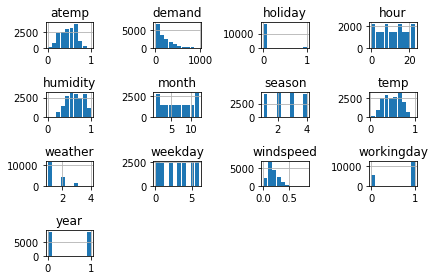

In [315]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

In [ ]:
#Visualising continuous variable

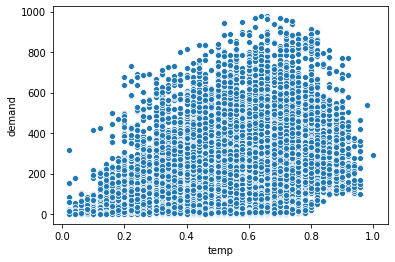

In [316]:
import seaborn as sns
sns.scatterplot(bikes_prep.temp,bikes_prep.demand)

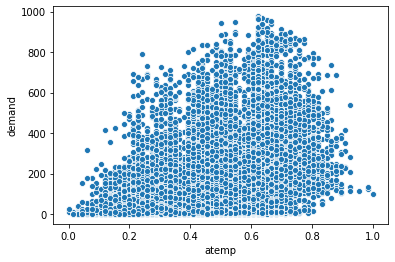

In [317]:
sns.scatterplot(bikes_prep.atemp,bikes_prep.demand)

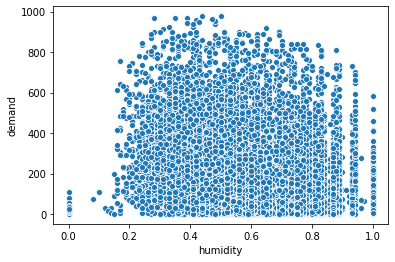

In [318]:
sns.scatterplot(bikes_prep.humidity,bikes_prep.demand)

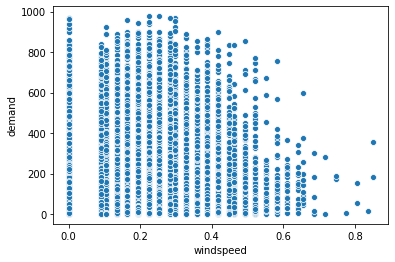

In [319]:
sns.scatterplot(bikes_prep.windspeed,bikes_prep.demand)

In [ ]:
#Visualise the categorical variable


In [320]:
bikes_prep.select_dtypes(include=['int']).columns.values

array(['season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather', 'demand'], dtype=object)

In [321]:
bikes_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  demand      17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [322]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [323]:
bikes_prep.groupby(['season']).agg({'demand':'mean'})

,demand
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


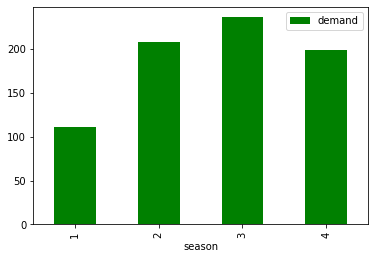

In [324]:
bikes_prep.groupby(['season']).agg({'demand':'mean'}).plot(kind='bar',color='green')

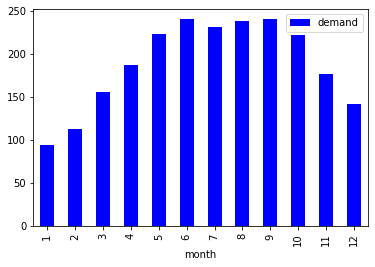

In [325]:
bikes_prep.groupby(['month']).agg({'demand':'mean'}).plot(kind='bar',color='blue')

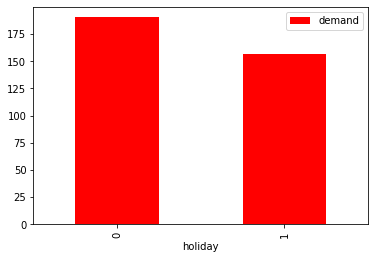

In [326]:
bikes_prep.groupby(['holiday']).agg({'demand':'mean'}).plot(kind='bar',color='red')

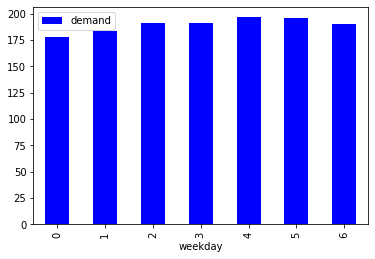

In [327]:
bikes_prep.groupby(['weekday']).agg({'demand':'mean'}).plot(kind='bar',color='blue')

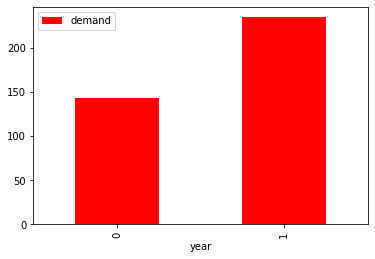

In [328]:
bikes_prep.groupby(['year']).agg({'demand':'mean'}).plot(kind='bar',color='red')


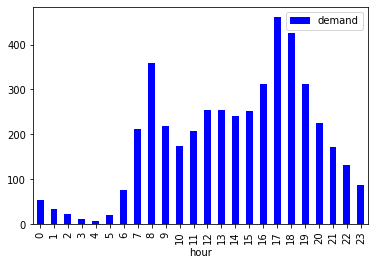

In [329]:
bikes_prep.groupby(['hour']).agg({'demand':'mean'}).plot(kind='bar',color='blue')

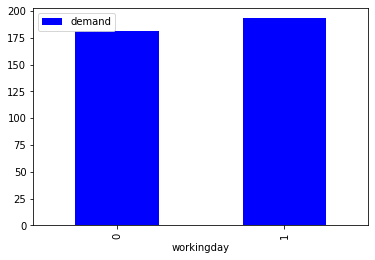

In [330]:
bikes_prep.groupby(['workingday']).agg({'demand':'mean'}).plot(kind='bar',color='blue')

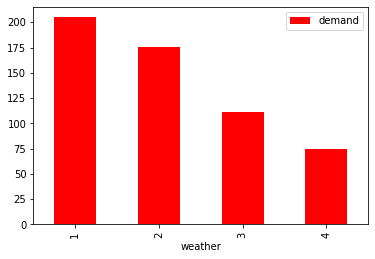

In [331]:
bikes_prep.groupby(['weather']).agg({'demand':'mean'}).plot(kind='bar',color='red')

In [332]:
bikes_prep.corr()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
year,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
month,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hour,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weather,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929


In [333]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [334]:
bikes_prep['humidity'].describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: humidity, dtype: float64

In [335]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [336]:
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f5b43d9a748>)

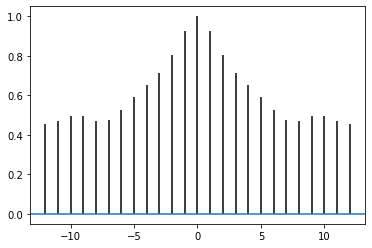

In [337]:
dff1=pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(dff1,maxlags=12)

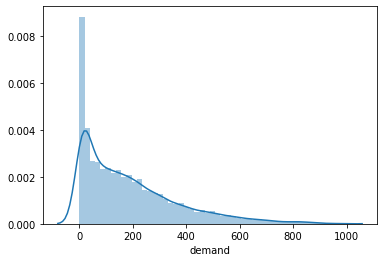

In [338]:
sns.distplot(bikes_prep.demand)

In [339]:
df1=bikes_prep['demand']
df2=np.log(df1)
df2

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17379, dtype: float64

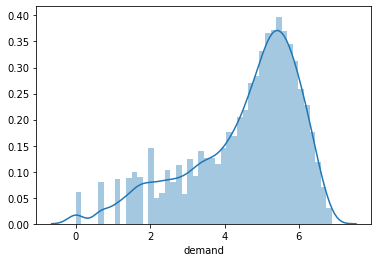

In [340]:
sns.distplot(df2)

In [341]:
bikes_prep['demand']=np.log(bikes_prep['demand'])
bikes_prep['demand']

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17379, dtype: float64

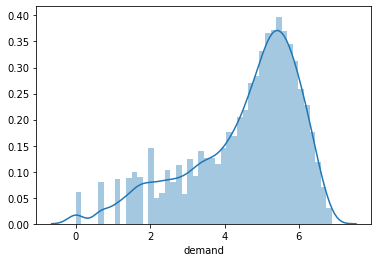

In [342]:
#bikes_prep['demand'].astype('int')
sns.distplot(bikes_prep.demand)

In [343]:
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [344]:
t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

In [345]:
t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']


In [346]:
bike_prep_lag=pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [347]:
bikes_prep_lag=bike_prep_lag.dropna()

In [348]:
bikes_prep_lag.dtypes

season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
demand        float64
t-1           float64
t-2           float64
t-3           float64
dtype: object

In [349]:
bikes_prep_lag.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand,t-1,t-2,t-3
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,2.564949,3.465736,3.688879,2.772589
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0.000000,2.564949,3.465736,3.688879
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0.000000,0.000000,2.564949,3.465736
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,0.693147,0.000000,0.000000,2.564949
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1.098612,0.693147,0.000000,0.000000


In [350]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [351]:
bikes_prep_lag=pd.get_dummies(bikes_prep_lag,drop_first=True)
bikes_prep_lag.head()

,year,weekday,workingday,temp,atemp,humidity,windspeed,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0,6,0,0.24,0.2879,0.75,0.0000,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,6,0,0.24,0.2879,0.75,0.0000,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0.24,0.2576,0.75,0.0896,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,6,0,0.22,0.2727,0.80,0.0000,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,6,0,0.20,0.2576,0.86,0.0000,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [352]:
bikes_prep_lag.drop(['atemp','windspeed'],axis=1,inplace=True)

In [353]:
bikes_prep_lag.head()

,year,weekday,workingday,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0,6,0,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,6,0,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,6,0,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,6,0,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [354]:
y=bikes_prep_lag[['demand']]
x=bikes_prep_lag.drop(['demand'],axis=1)

In [355]:
tr_size=0.7*len(x)
tr_size=int(tr_size)


In [356]:
x_train=x.values[0:tr_size]
x_test=x.values[tr_size:len(x)]


In [357]:
y_train=y.values[0:tr_size]
y_test=y.values[tr_size:len(y)]

In [358]:
from sklearn.linear_model import LinearRegression
std_reg=LinearRegression()
std_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
r2_train=std_reg.score(x_train,y_train)
r2_test=std_reg.score(x_test,y_test)

In [360]:
y_predict=std_reg.predict(x_test)
y_predict

array([[3.2402214 ],
       [2.89412027],
       [3.2670008 ],
       ...,
       [4.52189432],
       [4.42329251],
       [3.87369996]])

In [361]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test,y_predict))
rmse

0.3597799508578842

In [362]:
y_test_e=[]
y_predict_e=[]
for i in range(0,len(y_test)):
  y_test_e.append(math.exp(y_test[i]))
  y_predict_e.append(math.exp(y_predict[i]))
  log_sq_sum=0
for i in range(0,len(y_test_e)):
    log_a=math.log(y_test_e[i]+1)
    log_p=math.log(y_predict_e[i]+1)
    log_diff=(log_p - log_a)**2
    log_sq_sum=log_sq_sum+log_diff
rmsle=math.sqrt(log_sq_sum/len(y_test))
print(rmsle)
 
  

0.3359315533671796
